In [1]:
%run resources/library.py

In [2]:
style_notebook()

# Notebook 6: Counting Soho District Building Footprints in Voronoi Cells

In [3]:
import osmnx as ox

ox.__version__

'0.15.0'

## Using OSMNx `footprints` feature

Let's assume that most buildings in 1854 Soho district are still intact and have footprints accessible through OSMNx. Let's use the SOHO_COORDINATES from the Cholera Basic Notebooks as a starting point for retrieving building footprints (polygons) using OSMNx `footprints` feature.

In [4]:
SOHO_COORDINATES = (51.513578, -0.136722)

In [5]:
# radius of 700m
distance = 700
footprints_gdf = \
    ox.footprints.footprints_from_point(SOHO_COORDINATES, distance, \
                footprint_type='building', retain_invalid=False)

Let's look at the `geometry` column - these are the building footprint polygons.

In [6]:
footprints_gdf = footprints_gdf[footprints_gdf['geometry'].notnull()]

footprints_gdf

,nodes,addr:city,building,building:levels,fee,name,name:de,name:en,name:es,name:gl,...,name:ko,name:la,name:ro,type,highway,check_date,alt_name:de,alt_name:mi,name:mi,architect
4372002,"[1835289528, 1835289527, 6173728483, 163778959...",London,yes,2,no,National Gallery,Nationalgalerie,National Gallery,Galería Nacional.,Galería Nacional,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10811256,"[96092352, 3521406607, 96092353, 1353074818, 9...",London,office,9,NaN,BBC Broadcasting House,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26706806,"[292899190, 6914269611, 292899192, 6914269613,...",London,hotel,NaN,NaN,The Ritz London,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27922125,"[306503584, 1232241680, 1232241677, 1232241736...",NaN,church,NaN,NaN,All Souls Church,NaN,All Souls Church,Iglesia All Souls,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28416536,"[312157991, 4240460196, 4240460197, 4237160294...",NaN,yes,6,NaN,Radisson Blu Edwardian Kenilworth,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7922579,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,multipolygon,NaN,NaN,NaN,NaN,NaN,NaN
8726036,NaN,NaN,commercial,NaN,NaN,50 Berkeley Street,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,multipolygon,NaN,NaN,NaN,NaN,NaN,NaN
9167474,NaN,NaN,residential,NaN,NaN,John Astor House,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,multipolygon,NaN,NaN,NaN,NaN,NaN,NaN
9261429,NaN,NaN,hotel,7,NaN,The Langham,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,multipolygon,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
footprints_gdf['geometry'].head()

4372002     POLYGON ((-0.12784 51.50926, -0.12842 51.50916...
10811256    POLYGON ((-0.14405 51.51865, -0.14401 51.51853...
26706806    POLYGON ((-0.14215 51.50699, -0.14209 51.50701...
27922125    POLYGON ((-0.14310 51.51832, -0.14307 51.51831...
28416536    POLYGON ((-0.12825 51.51773, -0.12822 51.51773...
Name: geometry, dtype: geometry

<AxesSubplot:>

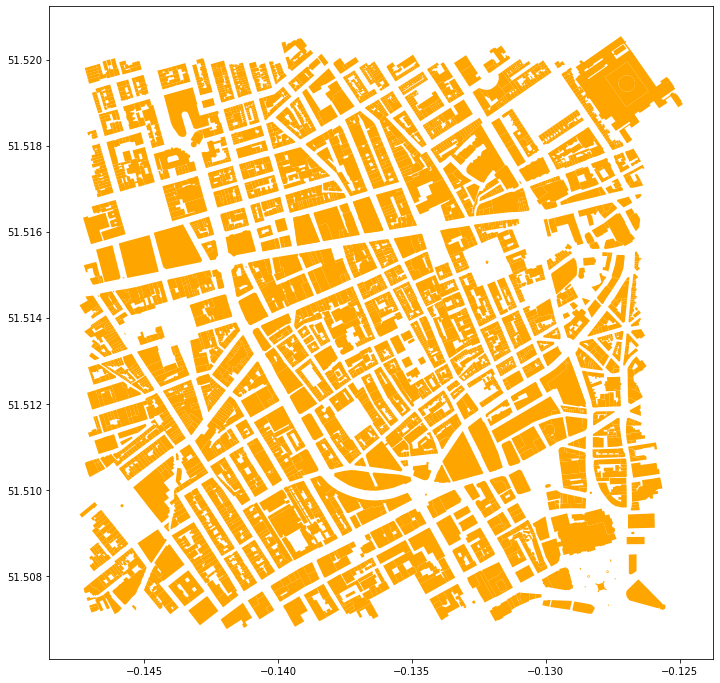

In [8]:
footprints_gdf['geometry'].plot(figsize=(14,12), color='orange')

In [9]:
footprints_gdf['geometry'].centroid

4372002     POINT (-0.12891 51.50887)
10811256    POINT (-0.14349 51.51881)
26706806    POINT (-0.14154 51.50705)
27922125    POINT (-0.14304 51.51815)
28416536    POINT (-0.12808 51.51791)
                      ...            
7922579     POINT (-0.12769 51.50810)
8726036     POINT (-0.14329 51.50777)
9167474     POINT (-0.13928 51.52018)
9261429     POINT (-0.14389 51.51767)
9261564     POINT (-0.14513 51.51780)
Length: 3676, dtype: geometry

In [10]:
import geopandas as gpd

gpd.__version__

'0.8.0'

## Creating a geodataframe of footprint centroids

The footprint feature of OSMNx allows you to plot polygons of buildings. But to determine if buildings are inside (belongs to) pump voronoi cells, we need to identify buildings by the centroid of its polygon vertices. Fortunately, `geometry` columns in Geopandas are native `shapely` objects. We can get polygon centroids by the attribute `centroid`.

In [11]:
footprints_centroid_gdf = gpd.GeoDataFrame(\
                            geometry=footprints_gdf['geometry'].centroid)\
                            .reset_index()\
                            .rename(columns={'index':'osmid'})

footprints_centroid_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3676 entries, 0 to 3675
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   osmid     3676 non-null   int64   
 1   geometry  3676 non-null   geometry
dtypes: geometry(1), int64(1)
memory usage: 57.6 KB


<AxesSubplot:>

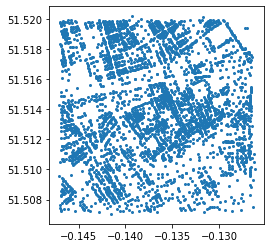

In [12]:
footprints_centroid_gdf.geometry.plot(markersize=4)

## Amplified cognition: Geopandas plots and computational geometry tricks

Because of of the different kinds of data that we already have, what if we could draw a Geopandas plot that looks like this?

![](images/subplots_overlay.png)

### Inventory of geodataframes and dataframes to use

Steps to draw this plot, layer by layer (bottom to top):

1. Building footprints, as  polygons, minus footprint polygons within pump Voronoi cells
2. Building footprints, as centroids (points), minus footprint centroids outside pump Voronoi cells
3. Building footprints, centroids within pump Voronoi cells
4. Pump Voronoi cells (clipped)
5. Street pumps

Let's reload the `clipped_voronoi_gdf` geodataframe. This is what we will use for geopandas `sjoin()` and `overlay()` functions. 

In [13]:
clipped_voronoi_gdf = gpd.read_file('outputs/clipped_voronoi.shp')\
    .rename(\
            columns={'vorpoint_l':'vorpoint_lat',\
                     'vorpoint_1':'vorpoint_lon',\
                     'points_in_polygon':'points_in_voronoi'
                    })

In [14]:
clipped_voronoi_gdf

,vorpoint_lat,vorpoint_lon,FID,Street,geometry
0,51.513341,-0.136668,250,Broadwick Street,"POLYGON ((-0.13640 51.51752, -0.13483 51.51780..."
1,51.513876,-0.139586,251,Kingly Street,"POLYGON ((-0.14106 51.51142, -0.14153 51.51193..."
2,51.514906,-0.139671,252,Ramillies Place,"POLYGON ((-0.14191 51.51420, -0.14161 51.51539..."
3,51.512354,-0.131630,253,Dean Street,"POLYGON ((-0.13006 51.51359, -0.12994 51.51343..."
4,51.512139,-0.133594,254,Rupert Street,"POLYGON ((-0.13329 51.51745, -0.13327 51.51743..."
5,51.511542,-0.135919,255,Bridle Lane,"POLYGON ((-0.13655 51.50871, -0.13677 51.50878..."
6,51.510019,-0.133962,256,Regent Street,"POLYGON ((-0.13138 51.50977, -0.13255 51.50861..."
7,51.511295,-0.138199,257,Warwick Street,"POLYGON ((-0.13677 51.50878, -0.13878 51.50938..."


### Geometry intersection using `overlay()`

We will use Geopandas' `overlay` function to perform computational geometry tasks. You can go this [link](http://geopandas.org/set_operations.html) to learn more about this. The intersection operation below creates a part of the footprint landscape in the shape of the clipped Voronoi cells.

<AxesSubplot:>

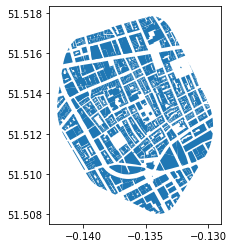

In [15]:
intersection = gpd.overlay(footprints_gdf, clipped_voronoi_gdf, how='intersection')

intersection.plot()

### Geometry difference using `overlay()`

The performance of the `difference` function results in a plot of the building footprints minus the area that falls under the clipped Voronoi cells.

<AxesSubplot:>

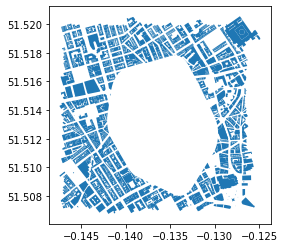

In [16]:
difference1 = gpd.overlay(footprints_gdf, clipped_voronoi_gdf, how='difference')

difference1.plot()

### Point geometry within polygon geometry using Geopandas `sjoin()`

The next difference operation is between geometries for building centroids (`footprints_centroid_gdf`, `shapely` points) and the clipped Voronoi polygons (`clipped_voronoi_gdf`, `shapely` polygons), and is an `sjoin` geopandas operation. The result is a subset of building footprint centroids that lie within the polygons.

In [17]:
difference2 = \
    gpd.sjoin(footprints_centroid_gdf, clipped_voronoi_gdf, how="inner", op='intersects')

In [18]:
difference2

,osmid,geometry,index_right,vorpoint_lat,vorpoint_lon,FID,Street
14,33632838,POINT (-0.13665 51.51637),0,51.513341,-0.136668,250,Broadwick Street
158,40952627,POINT (-0.13485 51.51573),0,51.513341,-0.136668,250,Broadwick Street
168,44521980,POINT (-0.13588 51.51680),0,51.513341,-0.136668,250,Broadwick Street
187,54666913,POINT (-0.13697 51.51365),0,51.513341,-0.136668,250,Broadwick Street
188,54666919,POINT (-0.13755 51.51375),0,51.513341,-0.136668,250,Broadwick Street
...,...,...,...,...,...,...,...
3041,572783245,POINT (-0.13609 51.51135),5,51.511542,-0.135919,255,Bridle Lane
3042,572783246,POINT (-0.13604 51.51139),5,51.511542,-0.135919,255,Bridle Lane
3043,572783247,POINT (-0.13599 51.51143),5,51.511542,-0.135919,255,Bridle Lane
3044,572783248,POINT (-0.13588 51.51143),5,51.511542,-0.135919,255,Bridle Lane


<AxesSubplot:>

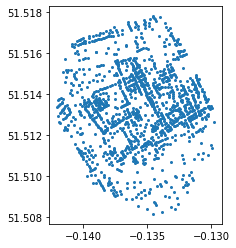

In [19]:
difference2['geometry'].plot(markersize=4)

<AxesSubplot:>

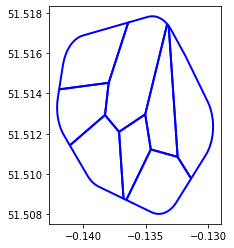

In [20]:
clipped_voronoi_gdf.plot(facecolor="none", edgecolor='blue',linewidth=2)

<AxesSubplot:>

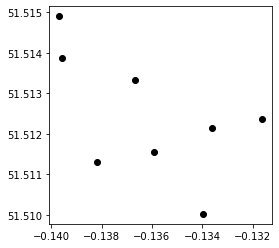

In [21]:
pumps_gdf = gpd.read_file('outputs/pumps.shp')

pumps_gdf.plot(color='black')

## Summary of plots

As an exercise in Pandas plots, let's put together all the plots above. The numbers "331" in the function `add_subplot(331)` mean (rows, columns, graph position or order). `(331)` means "draw me subplots of 3 rows by 3 columns, use position 1".

In [22]:
import matplotlib.pyplot as plt

%matplotlib inline

Let's review all the subplots before we overlay them togther in one plot.

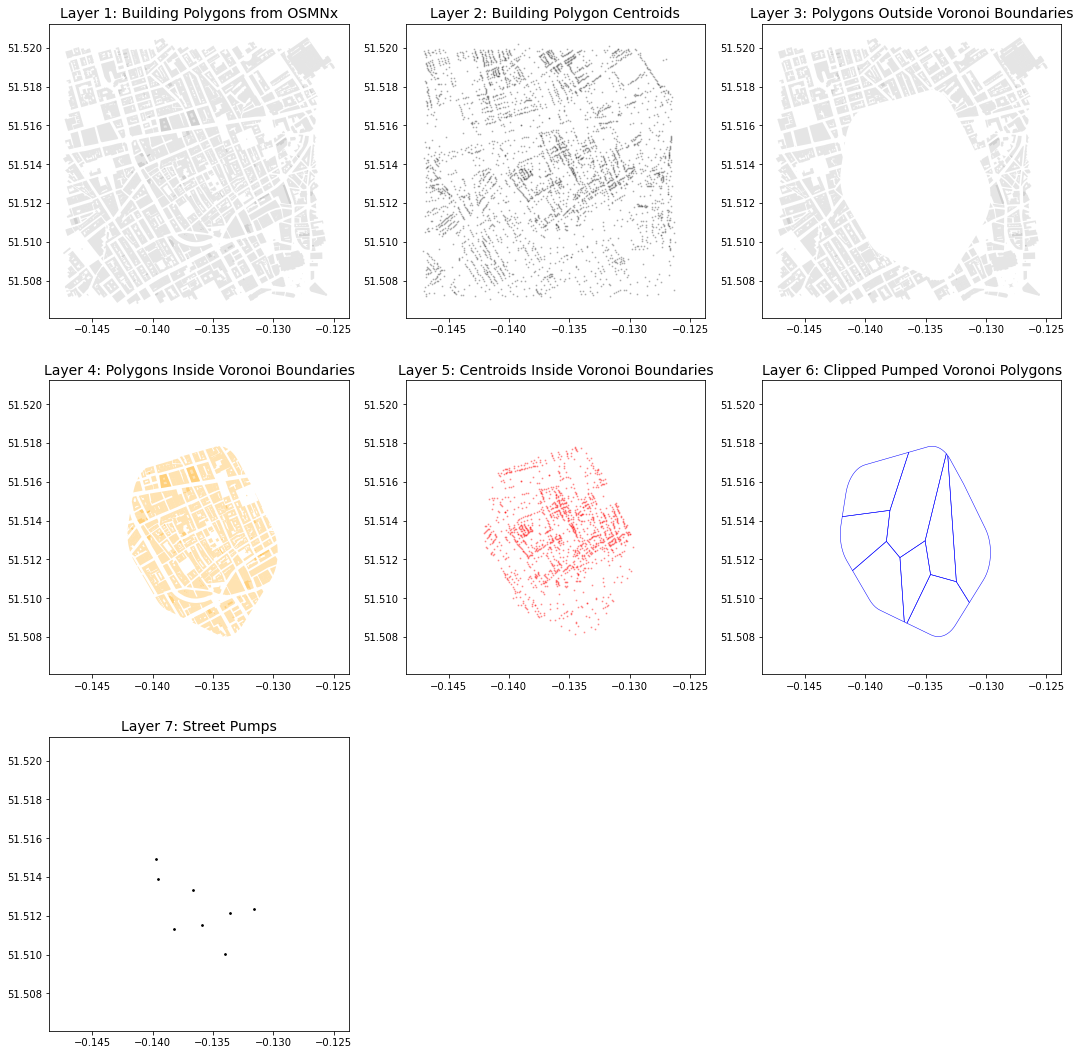

In [23]:
fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(331)
# make all the other subplots share x and y scales with ax1
ax2 = fig.add_subplot(332, sharey=ax1, sharex=ax1)
ax3 = fig.add_subplot(333, sharey=ax1, sharex=ax1)
ax4 = fig.add_subplot(334, sharey=ax1, sharex=ax1)
ax5 = fig.add_subplot(335, sharey=ax1, sharex=ax1)
ax6 = fig.add_subplot(336, sharey=ax1, sharex=ax1)
ax7 = fig.add_subplot(337, sharey=ax1, sharex=ax1)

fs = 14
footprints_gdf['geometry'].plot(color='gray', alpha=0.2, ax=ax1)
ax1.set_title('Layer 1: Building Polygons from OSMNx', fontsize=fs)

footprints_centroid_gdf.geometry.plot(color='black', alpha=0.2, markersize=1, ax=ax2)
ax2.set_title('Layer 2: Building Polygon Centroids', fontsize=fs)

difference1.plot(color='gray', alpha=0.2, ax=ax3)
ax3.set_title('Layer 3: Polygons Outside Voronoi Boundaries', fontsize=fs)

intersection.plot(color='orange', alpha=0.3, ax=ax4)
ax4.set_title('Layer 4: Polygons Inside Voronoi Boundaries', fontsize=fs)

difference2['geometry'].plot(color='red', alpha=0.3, markersize=1, ax=ax5)
ax5.set_title('Layer 5: Centroids Inside Voronoi Boundaries', fontsize=fs)

clipped_voronoi_gdf.plot(facecolor="none", edgecolor='blue', linewidth=0.5, ax=ax6)
ax6.set_title('Layer 6: Clipped Pumped Voronoi Polygons', fontsize=fs)

pumps_gdf.plot(color='black', ax=ax7, markersize=3)
ax7.set_title('Layer 7: Street Pumps', fontsize=fs)

plt.tight_layout()
plt.show()

### Put all the subplots together, layer by layer

Let's now add the subplots layer by layer to create a final plot.

Text(0.5, 114.0, 'Longitude')

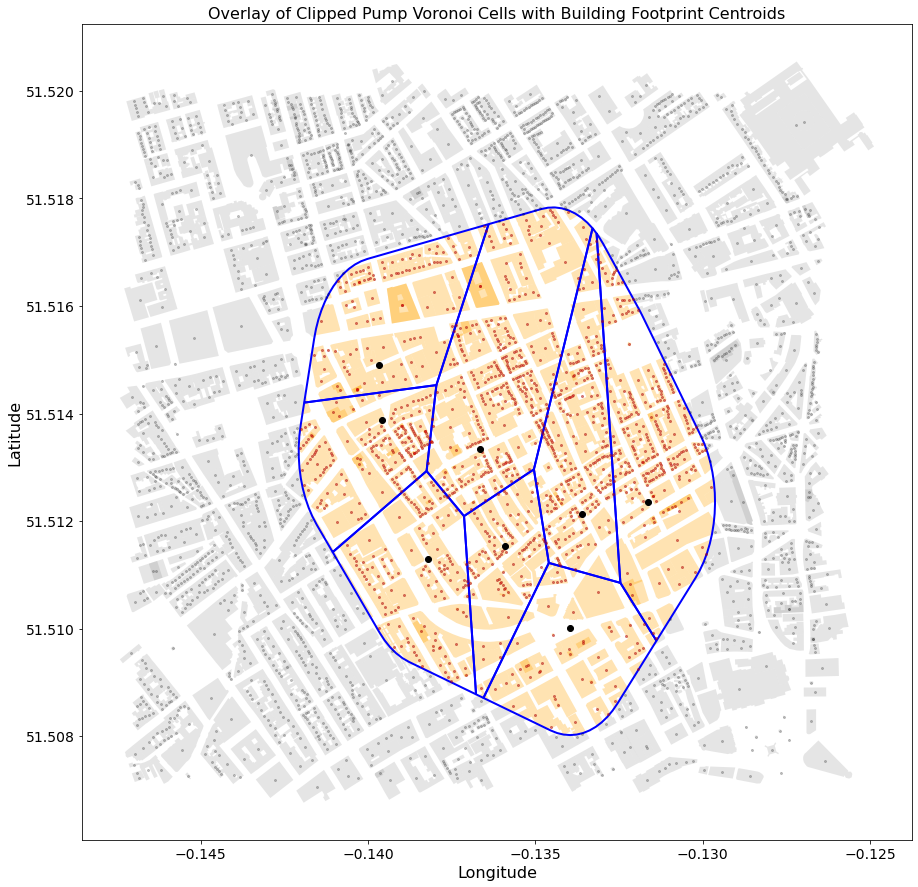

In [24]:
fig, ax = plt.subplots(figsize=(15,15))

# BUILDING FOOTPRINTS POLYGONS LAYER
# layer 1: building footprint polygons minus footprint polygons inside Voronoi cells
difference1['geometry'].plot(color='gray', ax=ax, alpha=0.2)
# layer 2: building footprint polygons that fit within Voronoi cells
intersection.plot(ax=ax, color='orange', linewidth=2, alpha=0.3)

# VORONOI POLYGONS
# layer 3: Voronoi cells from pumps, no fill color
clipped_voronoi_gdf.plot(ax=ax, facecolor="none", edgecolor='blue',linewidth=2)

# BUILDING FOOTPRINTS CENTROID, POINTS LAYER
# layer 4: black points, outside Voronoi cells
footprints_centroid_gdf.geometry.plot(color='black', ax=ax, alpha=0.2, markersize=4)
# layer 5: red points, inside Voronoi cells
difference2['geometry'].plot(color='red', ax=ax, alpha=0.3, markersize=4)
pumps_gdf.plot(color='black', ax=ax)

ax.set_title('Overlay of Clipped Pump Voronoi Cells with Building Footprint Centroids', \
             fontsize=16)
ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax.set_ylabel('Latitude', fontsize=16)
ax.set_xlabel('Longitude', fontsize=16)

Orange or gray polygons are the building footprints. Grey or red dots represent the building footprint centroids.

## Reuse the code for identifying death locations within Voronoi cells

In [25]:
%run resources/points_in_polygons.py

<Figure size 432x288 with 0 Axes>

In [26]:
# Read the data.
polygons = clipped_voronoi_gdf
points = footprints_centroid_gdf

polygons = points_in_polygons(points, polygons)

polygons

,vorpoint_lat,vorpoint_lon,FID,Street,geometry,points_in_polygon
0,51.513341,-0.136668,250,Broadwick Street,"POLYGON ((-0.13640 51.51752, -0.13483 51.51780...",324
1,51.513876,-0.139586,251,Kingly Street,"POLYGON ((-0.14106 51.51142, -0.14153 51.51193...",171
2,51.514906,-0.139671,252,Ramillies Place,"POLYGON ((-0.14191 51.51420, -0.14161 51.51539...",105
3,51.512354,-0.131630,253,Dean Street,"POLYGON ((-0.13006 51.51359, -0.12994 51.51343...",253
4,51.512139,-0.133594,254,Rupert Street,"POLYGON ((-0.13329 51.51745, -0.13327 51.51743...",227
5,51.511542,-0.135919,255,Bridle Lane,"POLYGON ((-0.13655 51.50871, -0.13677 51.50878...",98
6,51.510019,-0.133962,256,Regent Street,"POLYGON ((-0.13138 51.50977, -0.13255 51.50861...",52
7,51.511295,-0.138199,257,Warwick Street,"POLYGON ((-0.13677 51.50878, -0.13878 51.50938...",136


What we have now is a geodataframe with the number of building centroids found in each Voronoi polygon.

In [27]:
clipped_voronoi_buildings_gdf = \
    polygons.rename(columns={'vorpoint_l':'vorpoint_lat',\
                             'vorpoint_1':'vorpoint_lon',\
                            'points_in_polygon':'buildings_in_voronoi'})

clipped_voronoi_buildings_gdf

,vorpoint_lat,vorpoint_lon,FID,Street,geometry,buildings_in_voronoi
0,51.513341,-0.136668,250,Broadwick Street,"POLYGON ((-0.13640 51.51752, -0.13483 51.51780...",324
1,51.513876,-0.139586,251,Kingly Street,"POLYGON ((-0.14106 51.51142, -0.14153 51.51193...",171
2,51.514906,-0.139671,252,Ramillies Place,"POLYGON ((-0.14191 51.51420, -0.14161 51.51539...",105
3,51.512354,-0.131630,253,Dean Street,"POLYGON ((-0.13006 51.51359, -0.12994 51.51343...",253
4,51.512139,-0.133594,254,Rupert Street,"POLYGON ((-0.13329 51.51745, -0.13327 51.51743...",227
5,51.511542,-0.135919,255,Bridle Lane,"POLYGON ((-0.13655 51.50871, -0.13677 51.50878...",98
6,51.510019,-0.133962,256,Regent Street,"POLYGON ((-0.13138 51.50977, -0.13255 51.50861...",52
7,51.511295,-0.138199,257,Warwick Street,"POLYGON ((-0.13677 51.50878, -0.13878 51.50938...",136


Let's save these to files.

In [28]:
clipped_voronoi_buildings_gdf.to_file('outputs/clipped_voronoi_buildings.shp')
clipped_voronoi_buildings_gdf.to_file("outputs/clipped_voronoi_buildings_gdf.json", \
                                      driver="GeoJSON")

## Create the barchart for buildings in Voronoi cells 

In [29]:
import pandas as pd

pd.__version__

'1.0.5'

### Buildings per street  pump Voronoi cell

Text(0.5, 0, 'Building Count')

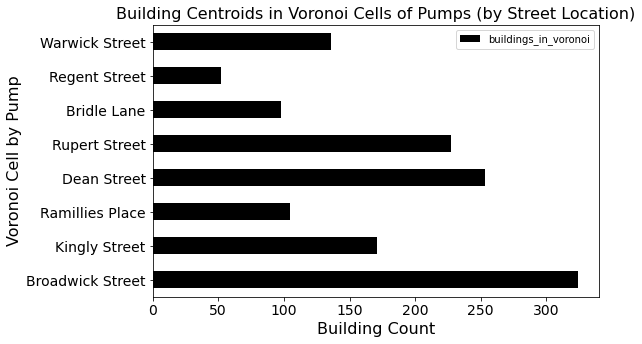

In [30]:
ax = pd.DataFrame(clipped_voronoi_buildings_gdf)\
    .plot.barh(y='buildings_in_voronoi', x='Street', color='k', figsize=(8,5))
ax.set_title('Building Centroids in Voronoi Cells of Pumps (by Street Location)', \
             fontsize=16)
ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax.set_ylabel('Voronoi Cell by Pump', fontsize=16)
ax.set_xlabel('Building Count', \
              fontsize=16)

Which street pump catchment area has the most building footprints (assuming these have been around in 1854)?

## Merge two geodataframes as Pandas dataframes with selected columns to plot two barcharts

In [31]:
death_locations_df = gpd.read_file('outputs/clipped_voronoi_counts.shp')\
    [['FID','points_in_','Street']].rename(columns={'points_in_':'death_locations'})

death_locations_df

,FID,death_locations,Street
0,250,137,Broadwick Street
1,251,38,Kingly Street
2,252,1,Ramillies Place
3,253,0,Dean Street
4,254,41,Rupert Street
5,255,21,Bridle Lane
6,256,0,Regent Street
7,257,12,Warwick Street


In [32]:
buildings_df = \
        clipped_voronoi_buildings_gdf[['FID','buildings_in_voronoi']]\
        .rename(columns={'buildings_in_voronoi':'buildings'})

buildings_df

,FID,buildings
0,250,324
1,251,171
2,252,105
3,253,253
4,254,227
5,255,98
6,256,52
7,257,136


In [33]:
voronoi_deaths_buildings_df = pd.merge(death_locations_df, buildings_df, \
                                       on='FID', how='inner')

voronoi_deaths_buildings_df

,FID,death_locations,Street,buildings
0,250,137,Broadwick Street,324
1,251,38,Kingly Street,171
2,252,1,Ramillies Place,105
3,253,0,Dean Street,253
4,254,41,Rupert Street,227
5,255,21,Bridle Lane,98
6,256,0,Regent Street,52
7,257,12,Warwick Street,136


### Plotting the two barcharts together...

Text(0.5, 22.200000000000003, 'Point Count')

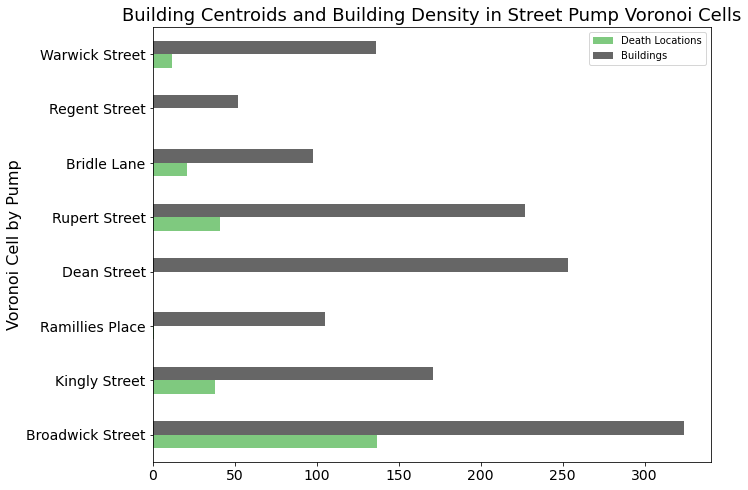

In [34]:
import matplotlib.pyplot as plt

ax1 = voronoi_deaths_buildings_df[['death_locations',\
                                  'buildings',\
                                  'Street']]\
    .rename(columns={'death_locations':'Death Locations',\
                    'buildings':'Buildings',\
                    'buildings per sq. meter':'Buildings per Sq. Meter'})\
    .plot.barh(figsize=(10,8), x='Street', colormap='Accent')


ax1.set_title('Building Centroids and Building Density in Street Pump Voronoi Cells', \
             fontsize=18)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax1.set_ylabel('Voronoi Cell by Pump', fontsize=16)
ax.set_xlabel('Point Count', \
              fontsize=16)


## Next Steps - Challenge

What's left to do is to plot the subplots on folium - do you think you can figure that out?

## References

1. Geopandas SJoin: http://geopandas.org/reference/geopandas.sjoin.html
2. Geopandas Overlay Set Operations: http://geopandas.org/set_operations.html
3. Pandas visualization guide: https://pandas.pydata.org/pandas-docs/version/0.25/user_guide/visualization.html
4. Matplotlib color map guide: https://matplotlib.org/examples/color/colormaps_reference.html
5. Stack Overflow reference for multiple plots, odd numbered: https://stackoverflow.com/questions/41025187/matplotlib-add-subplot-odd-number-of-plots